In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("D:\\Ultimate Programming\\Data Bases\\Customers Data.csv", encoding="ISO-8859-1")
df = pd.DataFrame(data)

In [24]:
df.head(8)

,CustomerKey,Prefix,FirstName,LastName,BirthDate,MaritalStatus,Gender,EmailAddress,AnnualIncome,TotalChildren,EducationLevel,Occupation,HomeOwner
0,11000,MR.,JON,YANG,4/8/1966,M,M,jon24@adventure-works.com,"$90,000",2,Bachelors,Professional,Y
1,11001,MR.,EUGENE,HUANG,5/14/1965,S,M,eugene10@adventure-works.com,"$60,000",3,Bachelors,Professional,N
2,11002,MR.,RUBEN,TORRES,8/12/1965,M,M,ruben35@adventure-works.com,"$60,000",3,Bachelors,Professional,Y
3,11003,MS.,CHRISTY,ZHU,2/15/1968,S,F,christy12@adventure-works.com,"$70,000",0,Bachelors,Professional,N
4,11004,MRS.,ELIZABETH,JOHNSON,8/8/1968,S,F,elizabeth5@adventure-works.com,"$80,000",5,Bachelors,Professional,Y
5,11005,MR.,JULIO,RUIZ,8/5/1965,S,M,julio1@adventure-works.com,"$70,000",0,Bachelors,Professional,Y
6,11007,MR.,MARCO,MEHTA,5/9/1964,M,M,marco14@adventure-works.com,"$60,000",3,Bachelors,Professional,Y
7,11008,MRS.,ROBIN,VERHOFF,7/7/1964,S,F,rob4@adventure-works.com,"$60,000",4,Bachelors,Professional,Y


In [25]:
df.isnull().sum()

CustomerKey         0
Prefix            130
FirstName           0
LastName            0
BirthDate           0
MaritalStatus       0
Gender            130
EmailAddress        0
AnnualIncome        0
TotalChildren       0
EducationLevel      0
Occupation          0
HomeOwner           0
dtype: int64

In [26]:
df["Prefix"] = df["Prefix"].replace(np.nan, "Hi")

In [27]:
df["Gender"] = df["Gender"].ffill()

In [28]:
df.isnull().sum()

CustomerKey       0
Prefix            0
FirstName         0
LastName          0
BirthDate         0
MaritalStatus     0
Gender            0
EmailAddress      0
AnnualIncome      0
TotalChildren     0
EducationLevel    0
Occupation        0
HomeOwner         0
dtype: int64

                                     PLOT THE DATA

In [55]:
gp_Gen = df.groupby("Gender").agg({"HomeOwner" : "count"})
gp_ms = df.groupby("HomeOwner").agg({"MaritalStatus" : "count"})

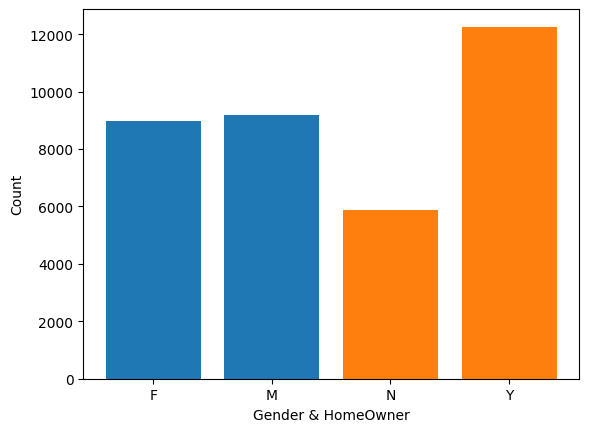

In [56]:
plt.bar(gp_Gen.index, gp_Gen.values.flatten())
plt.bar(gp_ms.index, gp_ms.values.flatten())
plt.xlabel("Gender & HomeOwner")
plt.ylabel("Count")
plt.show()

In [93]:
gp_ms = df.groupby("Occupation")["TotalChildren"].sum()
gp_ocu = df.groupby("Occupation")["HomeOwner"].count()
print(gp_ms)
print(gp_ocu)

Occupation
Clerical           4143
Management         7765
Manual             2760
Professional      12065
Skilled Manual     6725
Name: TotalChildren, dtype: int64
Occupation
Clerical          2859
Management        3011
Manual            2353
Professional      5424
Skilled Manual    4501
Name: HomeOwner, dtype: int64


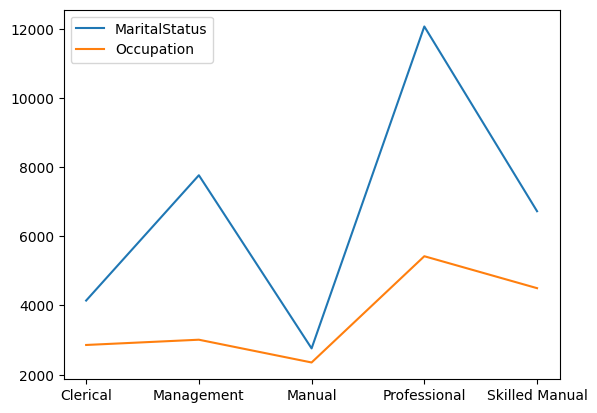

In [94]:
plt.plot(gp_ms.index, gp_ms.values, label="MaritalStatus")
plt.plot(gp_ocu.index, gp_ocu.values, label="Occupation")
plt.legend()
plt.show()

In [105]:
gp_tc = df.groupby("Occupation")["TotalChildren"].count()
print(gp_tc)

Occupation
Clerical          2859
Management        3011
Manual            2353
Professional      5424
Skilled Manual    4501
Name: TotalChildren, dtype: int64


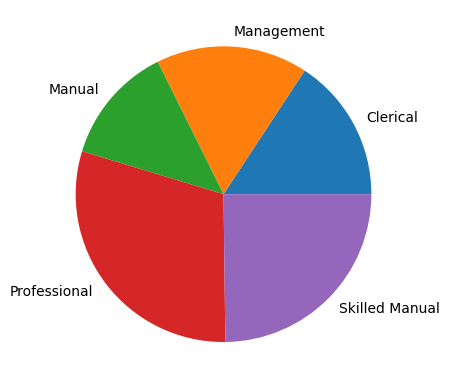

In [106]:
plt.pie(gp_tc.values, labels = gp_tc.index)
plt.show()

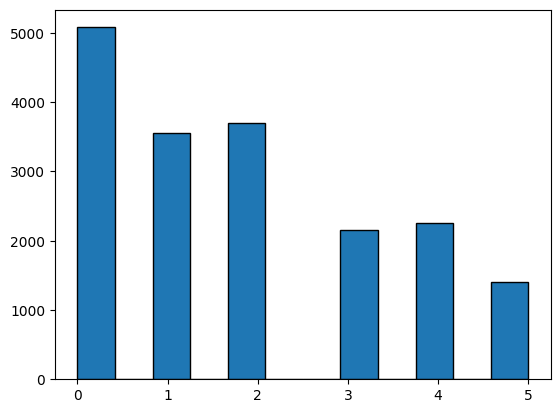

In [111]:
plt.hist(df["TotalChildren"], bins = 12, edgecolor = "black")
plt.show()

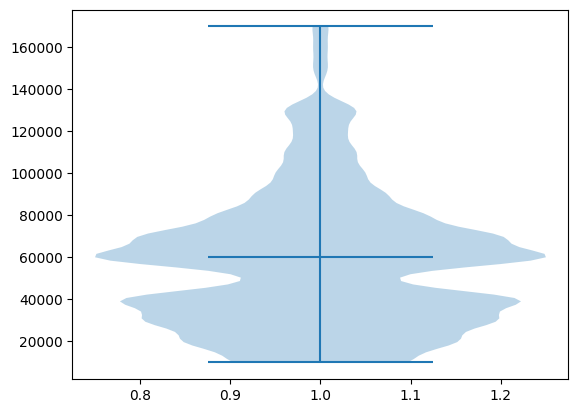

In [117]:
df['AnnualIncome'] = df['AnnualIncome'].replace('[$,]', '', regex=True).astype(float)
plt.violinplot(df["AnnualIncome"], showmedians = True)
plt.show()